# Generating and Plotting Data Distributions

We are going to look at how to generate and plot several different data distributions. 

For each distribution, run the cell a few times. You should notice that even with different samplings of the distribution (seen through the random number generation portion) the data still fits the plotted line of the distribution.

Then, for each cell, try changing some of the parameters and see how the distribution changes. If you are not sure what paramters to change, try looking up some of the functions in the scipy docs.

In [1]:
import matplotlib, pandas, scipy, sklearn
import matplotlib.pyplot as plt
import numpy as np

## Uniform
Let's take a look at how we can generate and plot some probability distributions. First let's look at the uniform distribution:

True


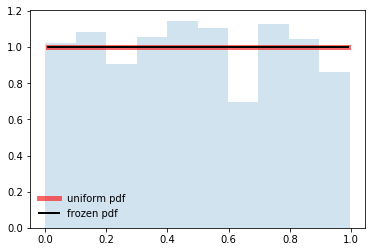

In [2]:
# uniform
from scipy.stats import uniform

# define plot
fig, ax = plt.subplots(1, 1)
    
# calculate the first few moments
mean, var, skew, kurt = uniform.stats(moments='mvsk')

# display the probability density function (pdf)
x = np.linspace(uniform.ppf(0.01), uniform.ppf(0.99), 100)
ax.plot(x, uniform.pdf(x), 'r-', lw=5, alpha=0.6, label='uniform pdf')


# Alternatively, the distribution object can be called (as a function) to fix the shape, location and scale parameters. This returns a “frozen” RV object holding the given parameters fixed.
# Freeze the distribution and display the frozen pdf:
rv = uniform()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

# Check accuracy of cdf and ppf:
vals = uniform.ppf([0.001, 0.5, 0.999])
print(np.allclose([0.001, 0.5, 0.999], uniform.cdf(vals)))

# generate random numbers
r = uniform.rvs(size=1000)

# and compare the histogram
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()


# display the figure
plt.show()

## Normal
Now let's take a look at the normal distribution:

True


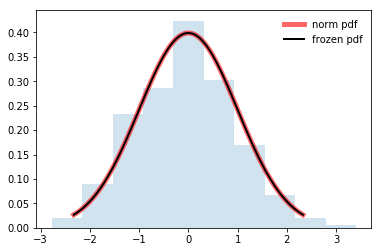

In [3]:
# normal
from scipy.stats import norm
# NOTE: norm.pdf(x) = exp(-x**2/2)/sqrt(2*pi)

# define plot
fig, ax = plt.subplots(1, 1)
    
# calculate the first few moments
mean, var, skew, kurt = norm.stats(moments='mvsk')

# display the probability density function (pdf)
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')


# Alternatively, the distribution object can be called (as a function) to fix the shape, location and scale parameters. This returns a “frozen” RV object holding the given parameters fixed.
# Freeze the distribution and display the frozen pdf:
rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

# Check accuracy of cdf and ppf:
vals = norm.ppf([0.001, 0.5, 0.999])
print(np.allclose([0.001, 0.5, 0.999], norm.cdf(vals)))

# generate random numbers
r = norm.rvs(size=1000)

# and compare the histogram
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()


# display the figure
plt.show()

## Bernoulli
Next, we will look at three of the main discrete distributions, starting with the bernoulli distribution:

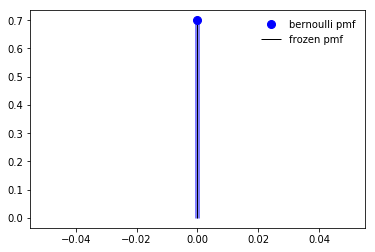

True


In [4]:
# bernoulli
from scipy.stats import bernoulli
# NOTE: bernoulli.pmf(k) = 1-p  if k = 0
#                        = p    if k = 1
#       for k in {0,1}
# 
# NOTE: bernoulli takes p as shape parameter

# define plot
fig, ax = plt.subplots(1, 1)
    
# calculate the first few moments
p = 0.3
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')

# display the probability density function (pmf)
x = np.arange(bernoulli.ppf(0.01, p), bernoulli.ppf(0.99, p))
ax.plot(x, bernoulli.pmf(x, p), 'bo', ms=8, label='bernoulli pmf')
ax.vlines(x, 0, bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5)

# Alternatively, the distribution object can be called (as a function) to fix the shape, location and scale parameters. This returns a “frozen” RV object holding the given parameters fixed.
# Freeze the distribution and display the frozen pdf:
rv = bernoulli(p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

# Check accuracy of cdf and ppf:
prob = bernoulli.cdf(x, p)
print(np.allclose(x, bernoulli.ppf(prob, p)))

# generate random numbers
r = bernoulli.rvs(p, size=1000)

# # and compare the histogram
# ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
# ax.legend(loc='best', frameon=False)


# # display the figure
# plt.show()

## Binomial

Next we look at the Binomial distribution

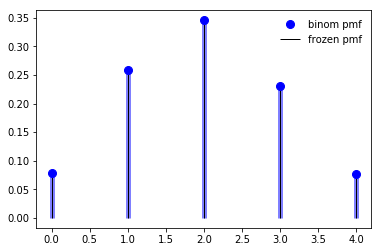

In [5]:
# binomial
from scipy.stats import binom
# NOTE: binom.pmf(k) = choose(n, k) * p**k * (1-p)**(n-k)
#       for k in {0,1,...,n}
# 
# NOTE: binomial takes n and p as shape parameter

# define plot
fig, ax = plt.subplots(1, 1)
    
# calculate the first few moments
n, p = 5, 0.4
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

# display the probability density function (pmf)
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

# Alternatively, the distribution object can be called (as a function) to fix the shape, location and scale parameters. This returns a “frozen” RV object holding the given parameters fixed.
# Freeze the distribution and display the frozen pdf:
rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
ax.legend(loc='best', frameon=False)

# Check accuracy of cdf and ppf:
prob = binom.cdf(x, n, p)
np.allclose(x, binom.ppf(prob, n, p))

# generate random numbers
r = binom.rvs(n, p, size=1000)

# # and compare the histogram
# ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
# ax.legend(loc='best', frameon=False)


# # display the figure
# plt.show()

## Poisson
Finally we will look at the Poisson distribution

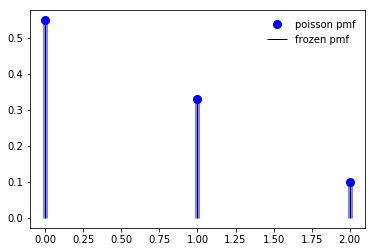

True


In [6]:
# poisson
from scipy.stats import poisson
# NOTE: poisson.pmf(k) = exp(-mu) * mu**k / k!
#       for k >= 0
# 
# NOTE: poisson takes mu as shape parameter

# define plot
fig, ax = plt.subplots(1, 1)
    
# calculate the first few moments
mu = 0.6
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

# display the probability density function (pmf)
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

# Alternatively, the distribution object can be called (as a function) to fix the shape, location and scale parameters. This returns a “frozen” RV object holding the given parameters fixed.
# Freeze the distribution and display the frozen pdf:
rv = poisson(mu)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

# Check accuracy of cdf and ppf:
prob = poisson.cdf(x, mu)
print(np.allclose(x, poisson.ppf(prob, mu)))

# generate random numbers
r = poisson.rvs(mu, size=1000)

# # and compare the histogram
# ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
# ax.legend(loc='best', frameon=False)


# # display the figure
# plt.show()

# Bias and Variance of Distributions

Now we will focus on the function used to calculate the first few moments for each distribution. 

We see that the continuous distributions have constant moments whereas the moments for the discrete distributions depend on their respective parameters.

In [7]:
# Uniform
mean, var, skew, kurt = uniform.stats(moments='mvsk')
print("Uniform:")
print("  mean:", mean)
print("  var:", var)
print("  skew:", skew)
print("  kurt:", kurt)

# Normal
mean, var, skew, kurt = norm.stats(moments='mvsk')
print("Normal:")
print("  mean:", mean)
print("  var:", var)
print("  skew:", skew)
print("  kurt:", kurt)

# Bernoulli
p = 0.3
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')
print("Bernoulli:")
print("  mean:", mean)
print("  var:", var)
print("  skew:", skew)
print("  kurt:", kurt)

# Binomial
n, p = 5, 0.4
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
print("Binomial:")
print("  mean:", mean)
print("  var:", var)
print("  skew:", skew)
print("  kurt:", kurt)

# Poisson
mu = 0.6
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
print("Poisson:")
print("  mean:", mean)
print("  var:", var)
print("  skew:", skew)
print("  kurt:", kurt)

Uniform:
  mean: 0.5
  var: 0.08333333333333333
  skew: 0.0
  kurt: -1.2
Normal:
  mean: 0.0
  var: 1.0
  skew: 0.0
  kurt: 0.0
Bernoulli:
  mean: 0.3
  var: 0.21
  skew: 0.8728715609439698
  kurt: -1.2380952380952375
Binomial:
  mean: 2.0
  var: 1.2
  skew: 0.18257418583505533
  kurt: -0.3666666666666668
Poisson:
  mean: 0.6
  var: 0.6
  skew: 1.2909944487358056
  kurt: 1.6666666666666667


Try changing the parameters for the discrete distributions and see how the moments change!